<a href="https://colab.research.google.com/github/Pathway2008/CarPrice/blob/main/carprice_eda%2Bnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Dataset Info.

train.csv [파일]
57920개의 데이터
ID : 샘플 별 고유 id
생산년도 : 차량이 생산된 연도
모델출시년도 : 차량의 모델이 처음으로 출시된 연도
브랜드
차량모델명
판매도시 : 3글자로 인코딩된 도시 이름
판매구역 : 3글자로 인코딩된 구역 이름
주행거리 : 총 주행 거리(km)
배기량 : 내연기관에서 피스톤이 최대로 밀어내거나 빨아들이는 부피 (cc)
압축천연가스(CNG) : 압축천연가스(CNG) 자동차 여부
경유 : 경유 자동차 여부
가솔린 : 가솔린 자동차 여부
하이브리드 : 하이브리드 자동차 여부
액화석유가스(LPG) : 액화석유가스(LPG) 자동차 여부
가격 : 자동차 가격(백만원)


test.csv [파일]
14480개의 데이터
ID : 샘플 별 고유 id
생산년도 : 차량이 생산된 연도
모델출시년도 : 차량의 모델이 처음으로 출시된 연도
브랜드
차량모델명
판매도시 : 3글자로 인코딩된 도시 이름
판매구역 : 3글자로 인코딩된 구역 이름
주행거리 : 총 주행 거리(km)
배기량 : 내연기관에서 피스톤이 최대로 밀어내거나 빨아들이는 부피 (cc)
압축천연가스(CNG) : 압축천연가스(CNG) 자동차 여부
경유 : 경유 자동차 여부
가솔린 : 가솔린 자동차 여부
하이브리드 : 하이브리드 자동차 여부
액화석유가스(LPG) : 액화석유가스(LPG) 자동차 여부


sample_submission.csv [제출양식]
ID : 샘플 별 고유 id
가격 : 자동차 가격(백만원)
'''

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/CarPrice/train.csv')
test = pd.read_csv('/content/drive/MyDrive/CarPrice/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/CarPrice/sample_submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


In [ ]:
train.head()

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55


In [ ]:
train.describe()

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,57920.000000,57920.000000,5.792000e+04,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000
mean,2011.355352,2008.033408,1.678691e+05,1788.160135,0.000483,0.425242,0.517956,0.010290,0.046029,52.211752
std,5.174108,5.087963,8.319120e+04,545.413818,0.021982,0.494384,0.499682,0.100918,0.209550,35.399718
min,1978.000000,1983.000000,1.000000e+00,875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.170000
25%,2008.000000,2004.000000,1.114345e+05,1461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.570000
50%,2011.000000,2008.000000,1.710000e+05,1753.000000,0.000000,0.000000,1.000000,0.000000,0.000000,42.250000
75%,2016.000000,2012.000000,2.200000e+05,1995.000000,0.000000,1.000000,1.000000,0.000000,0.000000,73.970000
max,2022.000000,2021.000000,2.500000e+06,6300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,156.000000


In [ ]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')

In [ ]:
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

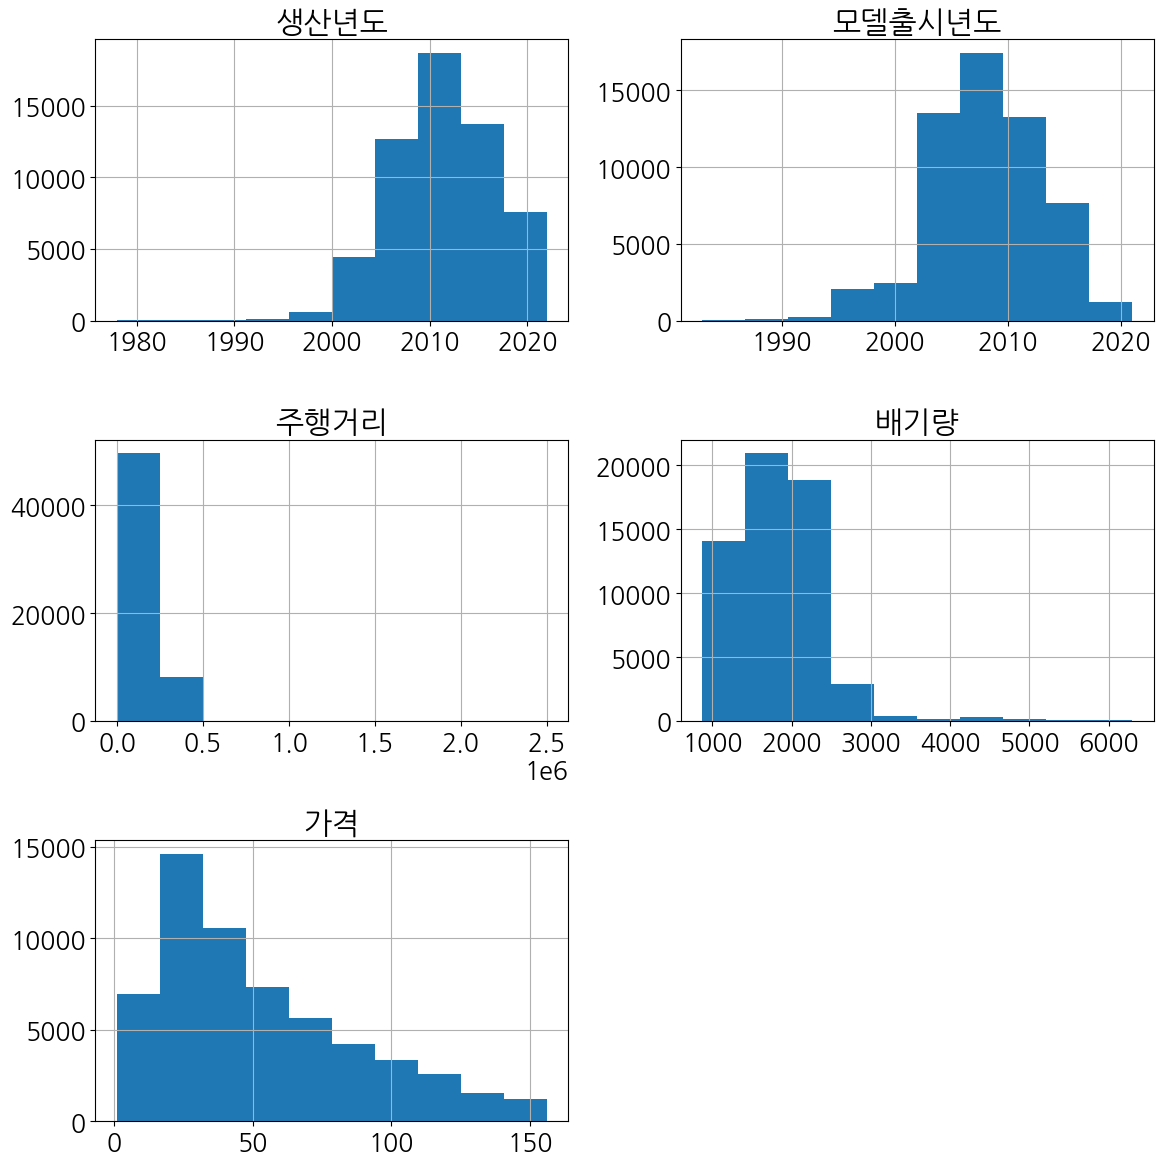

In [ ]:
not_nominal = train[['생산년도','모델출시년도','주행거리','배기량','가격']]
not_nominal.hist(figsize = (12,12))
plt.tight_layout()
plt.show()

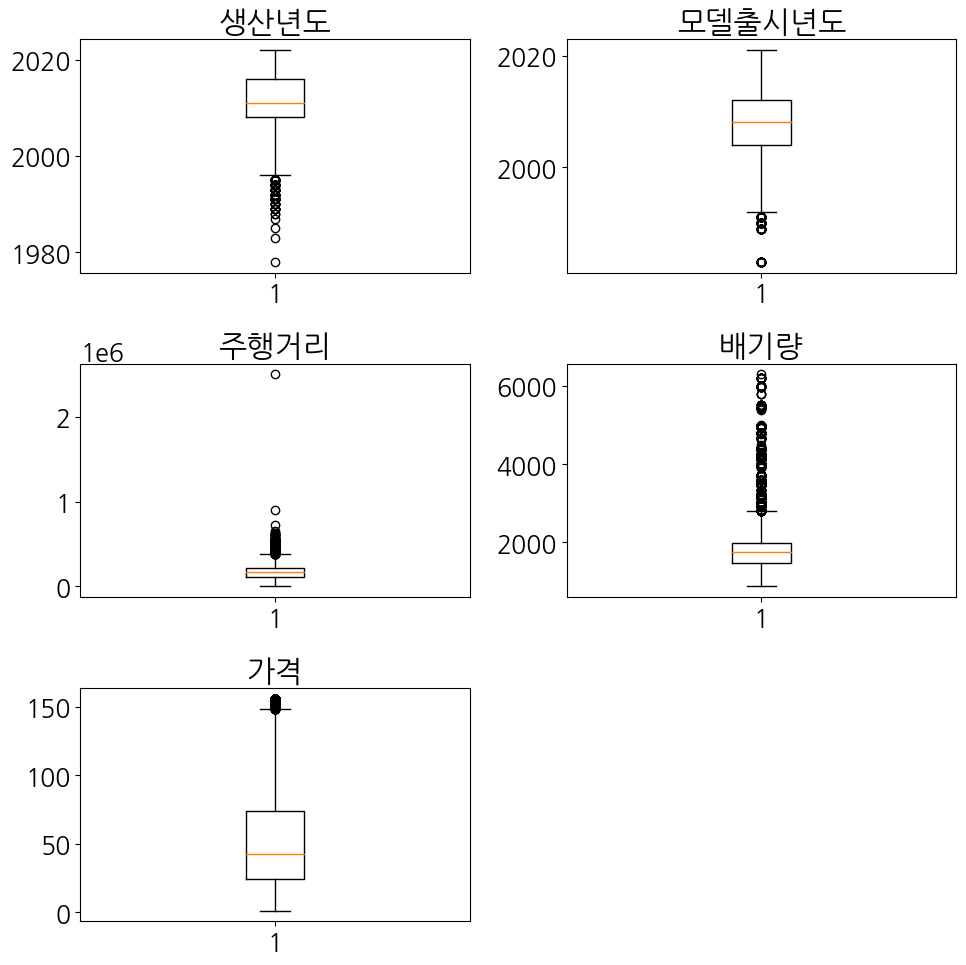

In [ ]:
not_nominal = train[['생산년도','모델출시년도','주행거리','배기량','가격']]

plt.figure(figsize=(10, 10))

for i, column in enumerate(not_nominal.columns):
    plt.subplot(3, 2, i+1)
    plt.boxplot(not_nominal[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

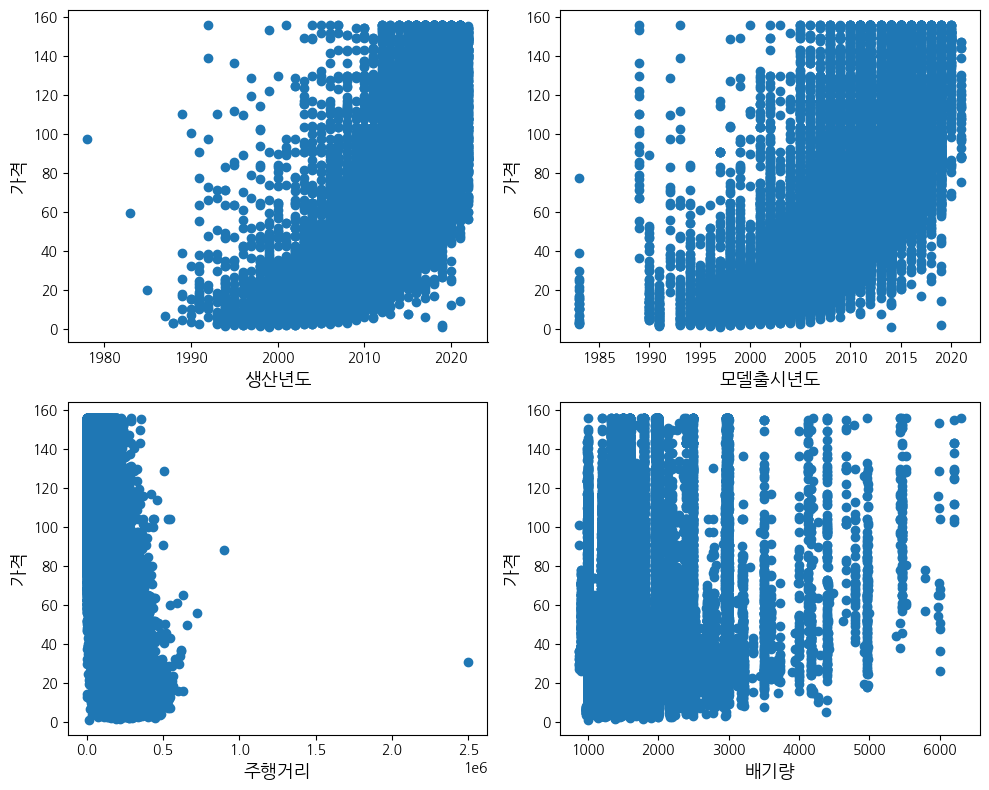

In [ ]:
plt.rc('font',family='NanumGothic')
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot 1
axes[0, 0].scatter(x=train['생산년도'], y=train['가격'])
axes[0, 0].set_ylabel('가격', fontsize=13)
axes[0, 0].set_xlabel('생산년도', fontsize=13)

# Scatter plot 2
axes[0, 1].scatter(x=train['모델출시년도'], y=train['가격'])
axes[0, 1].set_ylabel('가격', fontsize=13)
axes[0, 1].set_xlabel('모델출시년도', fontsize=13)

# Scatter plot 3
axes[1, 0].scatter(x=train['주행거리'], y=train['가격'])
axes[1, 0].set_ylabel('가격', fontsize=13)
axes[1, 0].set_xlabel('주행거리', fontsize=13)

# Scatter plot 4
axes[1, 1].scatter(x=train['배기량'], y=train['가격'])
axes[1, 1].set_ylabel('가격', fontsize=13)
axes[1, 1].set_xlabel('배기량', fontsize=13)

plt.tight_layout()
plt.show()

In [ ]:
smallest_values = train['생산년도'].nsmallest(2)

print(smallest_values)

36043    1978
7912     1983
Name: 생산년도, dtype: int64


In [ ]:
smallest_values = train['생산년도'].nsmallest(2).index
train = train.drop(smallest_values)

In [ ]:
largest_values = train['주행거리'].nlargest(3).index
train = train.drop(largest_values)

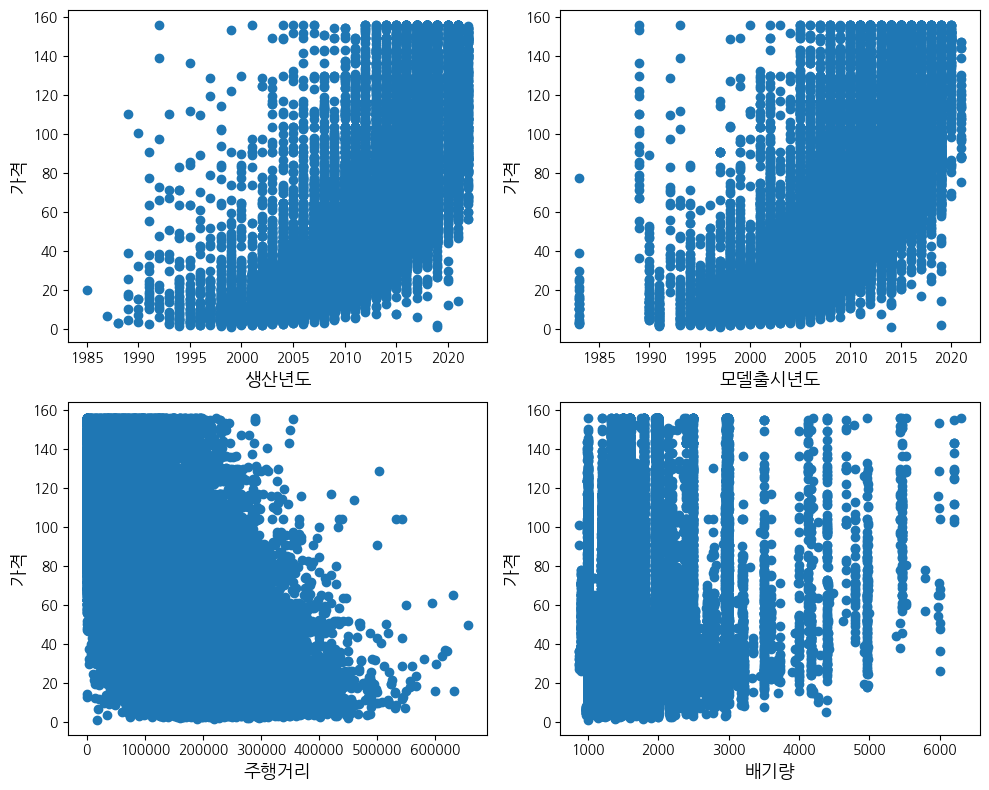

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot 1
axes[0, 0].scatter(x=train['생산년도'], y=train['가격'])
axes[0, 0].set_ylabel('가격', fontsize=13)
axes[0, 0].set_xlabel('생산년도', fontsize=13)

# Scatter plot 2
axes[0, 1].scatter(x=train['모델출시년도'], y=train['가격'])
axes[0, 1].set_ylabel('가격', fontsize=13)
axes[0, 1].set_xlabel('모델출시년도', fontsize=13)

# Scatter plot 3
axes[1, 0].scatter(x=train['주행거리'], y=train['가격'])
axes[1, 0].set_ylabel('가격', fontsize=13)
axes[1, 0].set_xlabel('주행거리', fontsize=13)

# Scatter plot 4
axes[1, 1].scatter(x=train['배기량'], y=train['가격'])
axes[1, 1].set_ylabel('가격', fontsize=13)
axes[1, 1].set_xlabel('배기량', fontsize=13)

plt.tight_layout()
plt.show()

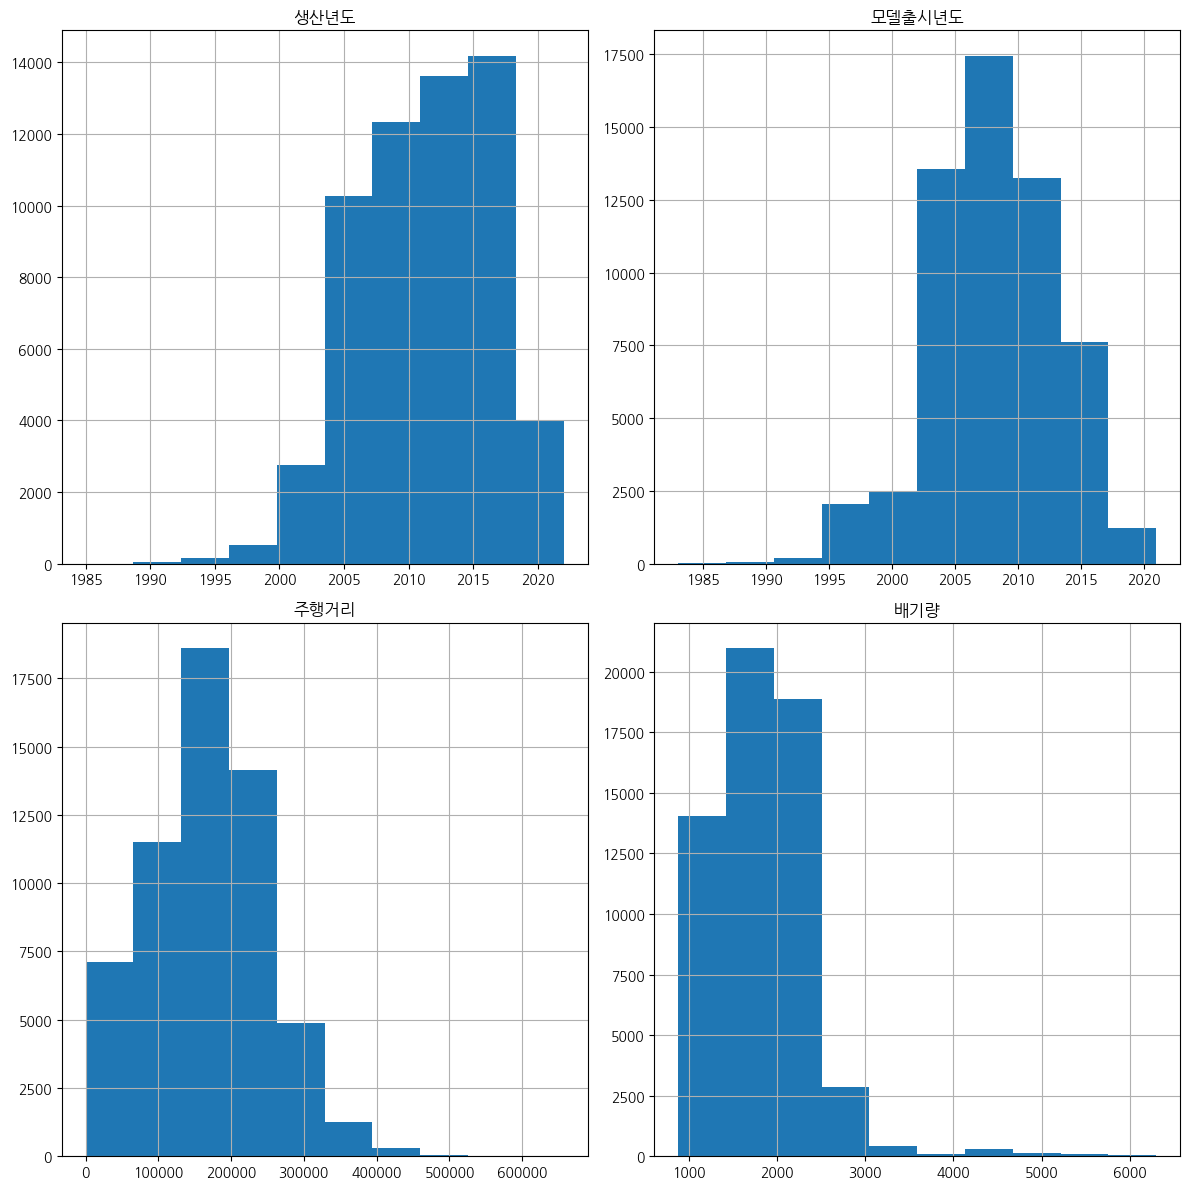

In [ ]:
not_nominal = train[['생산년도','모델출시년도','주행거리','배기량']]
not_nominal.hist(figsize = (12,12))
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import boxcox

In [ ]:
columns_to_transform = ['주행거리', '배기량']
for column in columns_to_transform:
    transformed_data, lambda_value = boxcox(train[column])
    train[column] = transformed_data

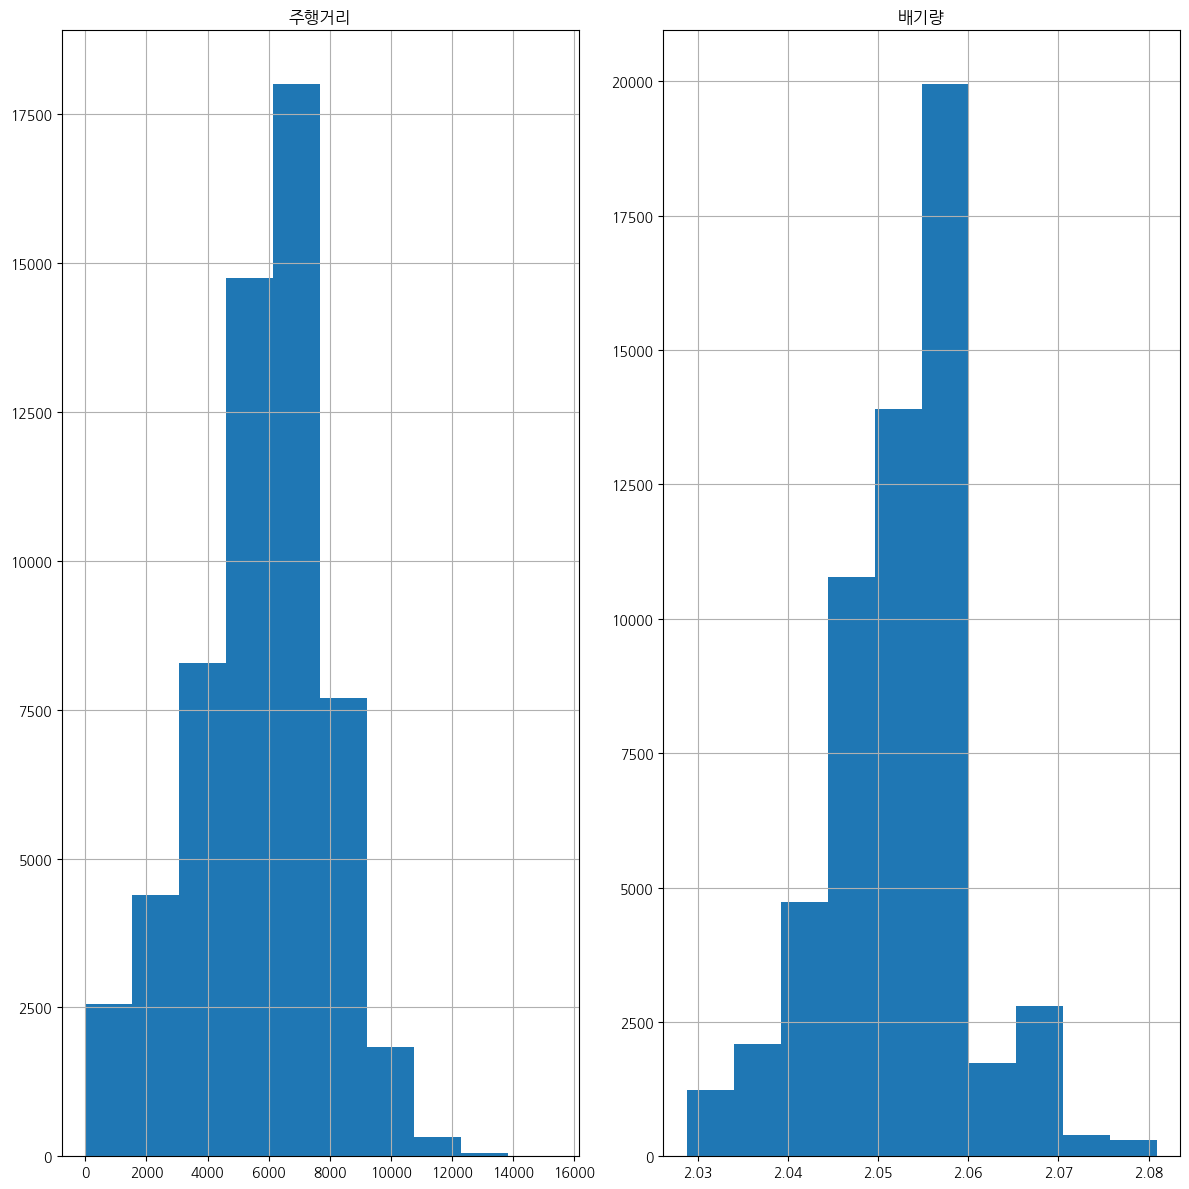

In [ ]:
train[['주행거리','배기량']].hist(figsize = (12,12))
plt.tight_layout()
plt.show()

In [ ]:
column_counts = train.nunique()
print(column_counts)

ID             57920
생산년도              39
모델출시년도            34
브랜드               20
차량모델명            143
판매도시            3224
판매구역              17
주행거리           20994
배기량              347
압축천연가스(CNG)        2
경유                 2
가솔린                2
하이브리드              2
액화석유가스(LPG)        2
가격              2466
dtype: int64


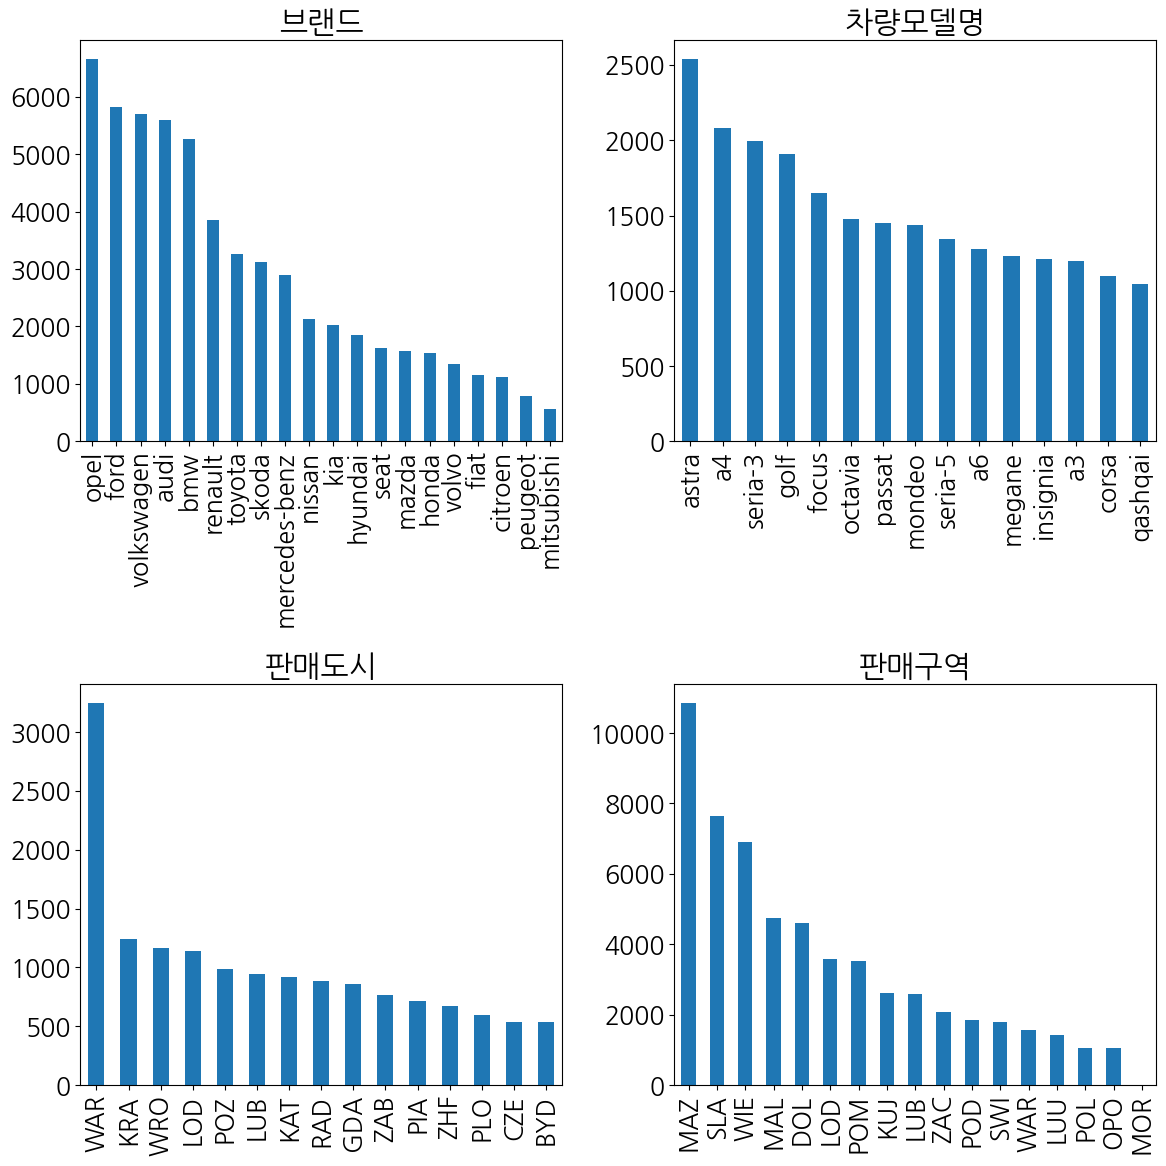

In [ ]:
a = train['브랜드'].value_counts()
b = train['차량모델명'].value_counts().head(15)
c = train['판매도시'].value_counts().head(15)
d = train['판매구역'].value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

a.plot(kind='bar', ax=axs[0, 0])
b.plot(kind='bar', ax=axs[0, 1])
c.plot(kind='bar', ax=axs[1, 0])
d.plot(kind='bar', ax=axs[1, 1])

axs[0, 0].set_title('브랜드')
axs[0, 1].set_title('차량모델명')
axs[1, 0].set_title('판매도시')
axs[1, 1].set_title('판매구역')

plt.tight_layout()
plt.show()

In [ ]:
corr = train.corr()
corr

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
생산년도,1.000000,0.899230,-0.633617,-0.311761,0.000008,0.062398,-0.033641,0.104627,-0.117383,0.754252
모델출시년도,0.899230,1.000000,-0.576276,-0.285319,-0.001379,0.052318,-0.027458,0.108243,-0.109941,0.706173
주행거리,-0.633617,-0.576276,1.000000,0.390262,0.006850,0.341444,-0.365048,-0.086310,0.105766,-0.519335
배기량,-0.311761,-0.285319,0.390262,1.000000,-0.010587,0.253841,-0.265280,0.003432,0.033152,0.121222
압축천연가스(CNG),0.000008,-0.001379,0.006850,-0.010587,1.000000,-0.018917,-0.022797,-0.002242,-0.004831,-0.008791
경유,0.062398,0.052318,0.341444,0.253841,-0.018917,1.000000,-0.891617,-0.087706,-0.188940,0.087424
가솔린,-0.033641,-0.027458,-0.365048,-0.265280,-0.022797,-0.891617,1.000000,-0.105696,-0.227694,-0.065623
하이브리드,0.104627,0.108243,-0.086310,0.003432,-0.002242,-0.087706,-0.105696,1.000000,-0.022398,0.132432
액화석유가스(LPG),-0.117383,-0.109941,0.105766,0.033152,-0.004831,-0.188940,-0.227694,-0.022398,1.000000,-0.112631
가격,0.754252,0.706173,-0.519335,0.121222,-0.008791,0.087424,-0.065623,0.132432,-0.112631,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
ordinal_features = ['브랜드', '차량모델명', '판매도시', '판매구역']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[feature] = le.transform(test[feature])

In [ ]:
train.head()

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,16,47,1214,12,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,17,20,2137,13,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,9,36,785,15,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,11,133,546,15,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,3,25,1839,5,251000,1910,0,1,0,0,0,17.55


In [ ]:
!pip install keras-tuner
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
X = train.drop(['ID', '가격'], axis=1)
y = train['가격']
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def build_model(hp):
    model = keras.Sequential()

    # Add input layer
    model.add(layers.Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32),
                           activation='relu',
                           input_shape=(X_train.shape[1],)))

    # Add hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                               activation='relu'))

    # Add output layer
    model.add(layers.Dense(1))

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_absolute_error')

    return model

In [ ]:
tuner = RandomSearch(build_model,
                     objective='val_loss',
                     max_trials=10,
                     executions_per_trial=1,
                     directory='my_dir',
                     project_name='vehicle_price_prediction')

In [ ]:
tuner.search(X_train.values, y_train.values,
             validation_data=(X_val.values, y_val.values),
             epochs=10,
             callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Trial 10 Complete [00h 01m 23s]
val_loss: 19.323326110839844

Best val_loss So Far: 19.323326110839844
Total elapsed time: 00h 04m 13s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 480)               61920     
                                                                 
 dense_2 (Dense)             (None, 480)               230880    
                                                                 
 dense_3 (Dense)             (None, 320)               153920    
                                                                 
 dense_4 (Dense)             (None, 416)               133536    
                                                                 
 dense_5 (Dense)             (None, 1)                 417       
                                                                 
Total params: 582,465
Trainable params: 582,465
Non-trai

In [ ]:
history=best_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
1448/1448 [==============================] - 11s 5ms/step - loss: 19.3789 - val_loss: 19.5220
Epoch 2/100
1448/1448 [==============================] - 6s 4ms/step - loss: 19.3969 - val_loss: 19.3160
Epoch 3/100
1448/1448 [==============================] - 5s 4ms/step - loss: 19.2869 - val_loss: 19.1532
Epoch 4/100
1448/1448 [==============================] - 6s 4ms/step - loss: 19.2276 - val_loss: 19.2730
Epoch 5/100
1448/1448 [==============================] - 5s 4ms/step - loss: 19.3091 - val_loss: 19.1244
Epoch 6/100
1448/1448 [==============================] - 6s 4ms/step - loss: 19.2288 - val_loss: 19.6501
Epoch 7/100
1448/1448 [==============================] - 5s 4ms/step - loss: 19.2743 - val_loss: 19.0860
Epoch 8/100
1448/1448 [==============================] - 5s 4ms/step - loss: 19.2421 - val_loss: 19.1714
Epoch 9/100
1448/1448 [==============================] - 6s 4ms/step - loss: 19.2281 - val_loss: 19.2530
Epoch 10/100
1448/1448 [==============================

In [ ]:
predictions = best_model.predict(X_val)

362/362 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, predictions)

# Print the MAE score
print("MAE:", mae)

MAE: 19.190289919623353


In [ ]:
#df_categorical_variables = pd.DataFrame (data, columns= ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'])